# LeNet + Fashion MNIST

220404

- CNN-(3-1) : 20분 40초

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


6


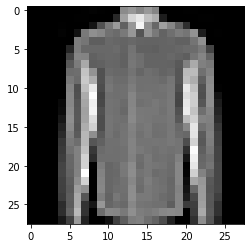

In [2]:
import matplotlib.pyplot as plt

print(y_train[95])
plt.imshow(x_train[95].reshape(28, 28), cmap='gray')

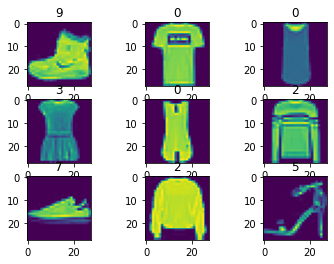

In [11]:
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
plt.show()

In [3]:
help(tf.keras.datasets.fashion_mnist.load_data)

# fashion mnist 분류
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

Help on function load_data in module tensorflow.python.keras.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.
    
    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with 

In [4]:
print(y_train[:100])

# [9(Ankle boot), 0(T-shirt/top), 0(T-shirt/top), 3(Dress)...]

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8]


In [5]:
X = tf.keras.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding="same", activation="swish")(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation="swish")(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation="swish")(H)
H = tf.keras.layers.Dense(84, activation="swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

In [6]:
result = model.fit(x_train, y_train, epochs=20, batch_size=100, validation_split=0.1)
# 결과를 result 에 담으면 시각화가 가능하다.

Epoch 1/20
540/540 [==============================] - 8s 6ms/step - loss: 0.6395 - accuracy: 0.7967 - val_loss: 0.3897 - val_accuracy: 0.8567
Epoch 2/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3583 - accuracy: 0.8694 - val_loss: 0.3545 - val_accuracy: 0.8687
Epoch 3/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3092 - accuracy: 0.8864 - val_loss: 0.3231 - val_accuracy: 0.8833
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 0.2767 - accuracy: 0.8994 - val_loss: 0.3523 - val_accuracy: 0.8817
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 0.2569 - accuracy: 0.9054 - val_loss: 0.3321 - val_accuracy: 0.8873
Epoch 6/20
540/540 [==============================] - 3s 6ms/step - loss: 0.2375 - accuracy: 0.9122 - val_loss: 0.3191 - val_accuracy: 0.8877
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 0.2247 - accuracy: 0.9167 - val_loss: 0.3470 - val_accuracy: 0.8822
Epoch 

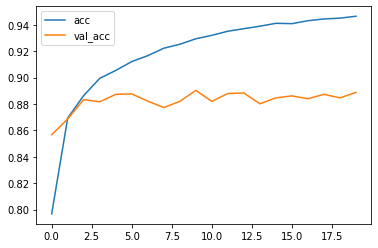

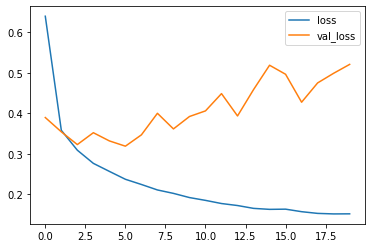

In [9]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# val_loss 의 상승은, 오버피팅이 일어나고 있다고 판단.

오버피팅의 문제 발생 가능성 (답지를 외워버리는 학습)

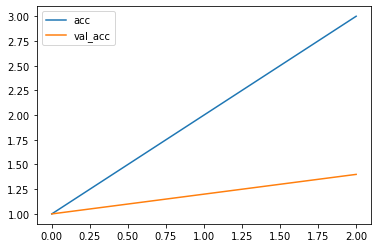

In [13]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3])
plt.plot([1, 1.2, 1.4])
plt.legend(['acc', 'val_acc'])
plt.show()

---

### 딥러닝의 문제점 : 오버피팅 방지하는 기술
- Dropout
- Augmentation
- BatcNormalization (논란이 좀 있음)

___

- 딥러닝 #3 ppt

<img src="./img/c12.png" width=70% height=70%>

---


- 참고 : LeNet은 아주 오래된 모델. (당시 학습 할 수 있는 최대치.. 손글씨 정도)

### AlexNet

<img src="./img/c11.png" width=100% height=100%>

- ILSVRC의 Winner가 된 CNN 최초 모델
- 두 개의 GPU를 활용한 병렬구조로 이루어졌다.
- relu 사용 (Vanishing Gradient (기울기 소멸)문제 해결을 위해 사용한 activation 함수)

<img src="./img/c13.png" width=40% height=40%>

- lrn-local response normalization
- overfitting 해결
    - data augmentation
    - dropout
    - batch normalize
    - l2 loss

---

### Dropout

- 딥려닝 #2 ppt . 21p

<img src="./img/c14.png" width=80% height=80%>

- 지정된 확률의 개수만큼 노드를 랜덤하게 제외하고 학습을 진행.
    - 정답을 모두 외우지 말고, 일부만 가지고도 답을 찾는다.
- 완성된 모델에서는 모든 노드를 사용.
- 효과 
    - 오버피팅 방지
    - 성능 향상
    - 앙상블 효과
- 학습이 된다면 dopout을 최대한 높게 줄수록 좋다. 데이터가 충분하면 0.4 ~ 0.6

In [21]:
X = tf.keras.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding="same", activation="swish")(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation="swish")(H)
H = tf.keras.layers.MaxPool2D()(H)

### Dropout
H = tf.keras.layers.Dropout(0.4)(H) # 최근에는 .6 까지도 사용한다.
# 데이터의 40%는 건너 뛴다.

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation="swish")(H)
H = tf.keras.layers.Dense(84, activation="swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0     

In [15]:
result = model.fit(x_train, y_train, epochs=20, batch_size=100, validation_split=0.1)

Epoch 1/20
540/540 [==============================] - 4s 6ms/step - loss: 0.9866 - accuracy: 0.7304 - val_loss: 0.4213 - val_accuracy: 0.8437
Epoch 2/20
540/540 [==============================] - 3s 6ms/step - loss: 0.4751 - accuracy: 0.8276 - val_loss: 0.3757 - val_accuracy: 0.8612
Epoch 3/20
540/540 [==============================] - 3s 6ms/step - loss: 0.4229 - accuracy: 0.8458 - val_loss: 0.3443 - val_accuracy: 0.8765
Epoch 4/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3883 - accuracy: 0.8571 - val_loss: 0.3406 - val_accuracy: 0.8763
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3682 - accuracy: 0.8662 - val_loss: 0.3287 - val_accuracy: 0.8773
Epoch 6/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3582 - accuracy: 0.8694 - val_loss: 0.3158 - val_accuracy: 0.8825
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3509 - accuracy: 0.8705 - val_loss: 0.3166 - val_accuracy: 0.8800
Epoch 

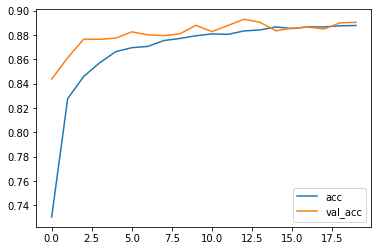

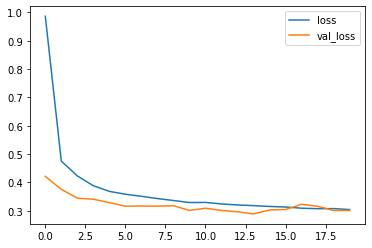

In [16]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.show()

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

- Max pooling 자체도 오버피팅 방지 효과가 있다.
- 특징을 추출한 특징맵에서 => 절반으로 줄이면서 4칸중 대표적인 1개의 특징만 가져온다.
- 다시말해 특징의 수를 줄는 것은, 모든 특징을 다 못지 못하게 방해하는 것과 같다.

---

### Data Augmentation (데이터 증강)

- 220404 . cnn(3-2)


갖고있는 데이터셋을 여러가지 방법으로 augment 하여 실질적인 학습 데이터 셋의 규모를 키울 수 있는 방법

ex) 단순 crop 이미지
- (256, 256) 이미지를 (244, 244) 로 자른다 (1픽셀씩 이동) => 32 * 32 = 1024장이 만들어짐.
- (256, 256) 이미지를 10,000 장으로 학습을 시작한다면, 실제 사용하는 이미지는 1,024,000 장이다.
- 좌우 반전까지 하면, 2000만장


In [2]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
#                                                   test_size=0.2,
#                                                   stratify=y_train,
#                                                   random_state=1)

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,    # 랜덤하게 왼쪽, 오른쪽으로 0.1 만큼 이동 
    height_shift_range=0.1,   # 랜덤하게 위, 아래로 0.1 만큼 이동 
    zoom_range=0.1,           # 줌을 0.1
    horizontal_flip=True      # 좌우 반전
)

train_gen = datagen.flow(x_train, y_train, batch_size=128)

(128, 28, 28, 1) (128,)
9


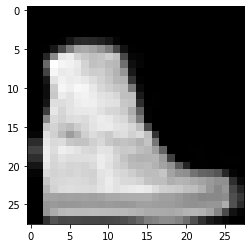

In [19]:
import matplotlib.pyplot as plt

x_sam, y_sam = train_gen[0]
print(x_sam.shape, y_sam.shape)

print(y_sam[0])
plt.imshow(x_sam[0].reshape(28, 28), cmap="gray")

# 출력 할때 마다 다른 이미지가 나옴

In [22]:
 # validation_split 못쓴다. 에러가 발생한다.
 # 미리 validation 용 데이터를 따로 준비를 해두어야 한다. 
 # 일단 없으니까 x_test, y_test 를 사용
model.fit(train_gen, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 16ms/step - loss: 1.2994 - accuracy: 0.6208 - val_loss: 0.5989 - val_accuracy: 0.7806
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.6835 - accuracy: 0.7430 - val_loss: 0.5355 - val_accuracy: 0.8019
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.6220 - accuracy: 0.7652 - val_loss: 0.5943 - val_accuracy: 0.7911
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5844 - accuracy: 0.7795 - val_loss: 0.4819 - val_accuracy: 0.8243
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.5587 - accuracy: 0.7876 - val_loss: 0.4595 - val_accuracy: 0.8330
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5459 - accuracy: 0.7941 - val_loss: 0.4429 - val_accuracy: 0.8359
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5259 - accuracy: 0.8014 - val_loss: 0.4523 - val_accuracy: 0.836

---

### early stopping

<img src="./img/c15.png" width=80% height=80%>

- 과적합이 일어 나기 전, val_loss 가 최 저점 있때, 자동으로 학습을 끝내줌


In [23]:
# 얼리 스탑핑 코드

early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # 기준점
    min_delta=0,         # 0 : 최소값 보다 낮지 않으면 불인정 / 0.5 : 최소값 보다 0.5 까지는 인정
    patience=10,         # 최소값이 보이고 10번 더 진행해서 낮은값이 안나오면 스톱
    restore_best_weights=True # 최소값으로 회귀 (bset weight 로)
)

# epochs 를 많이 줘도 최소값에 의해 멈추기 때문에 많이 줘도 상관 없다.
model.fit(train_gen, epochs=100000, validation_data=(x_test, y_test), callbacks=[early])
# callbacks=[early] 를 넣어주면 작동

Epoch 1/100000
469/469 [==============================] - 7s 15ms/step - loss: 0.4942 - accuracy: 0.8134 - val_loss: 0.3959 - val_accuracy: 0.8503
Epoch 2/100000
469/469 [==============================] - 7s 15ms/step - loss: 0.4885 - accuracy: 0.8138 - val_loss: 0.4167 - val_accuracy: 0.8450
Epoch 3/100000
469/469 [==============================] - 7s 15ms/step - loss: 0.4834 - accuracy: 0.8160 - val_loss: 0.3810 - val_accuracy: 0.8627
Epoch 4/100000
469/469 [==============================] - 7s 15ms/step - loss: 0.4749 - accuracy: 0.8208 - val_loss: 0.3931 - val_accuracy: 0.8554
Epoch 5/100000
469/469 [==============================] - 7s 16ms/step - loss: 0.4723 - accuracy: 0.8221 - val_loss: 0.3830 - val_accuracy: 0.8577
Epoch 6/100000
469/469 [==============================] - 7s 15ms/step - loss: 0.4704 - accuracy: 0.8229 - val_loss: 0.3768 - val_accuracy: 0.8626
Epoch 7/100000
469/469 [==============================] - 7s 15ms/step - loss: 0.4662 - accuracy: 0.8246 - val_loss: 0

- val_loss 값이 7번째 학습에 0.3645 보다 10번더 낮은 값이 없었기 때문에 멈춤

---

### Batch Normalization (배치 정규화) - 간단히 설명

- Layer 사이에 중간 결과 데이터들을 표준정규화하는 계층
    - 학습 단계에서는 batch 단위로 정규화하고
    - 모델 적용시의 $\sigma , \mu$ 는 사용하던 값들의 이동평균값을 이용한다.
- Internal Covariant Shift 문제를 해결한다.
- 무조건 쓴다고 가정하자. 

$$ BN(x_i) = \gamma * ( {x_i - \mu_B \over \sigma_B} ) + \beta  $$

ex)
- 10개의 점이 우상향으로 있는 x,y 그래프가 있다고 하자.
- 임의로 5개씩 선택하며 (y = wx + b) 의 loss 값이 최소가 되는 선분을 찾는다.
- 계속 반복하다 보면 중앙으로 모이게 된다.

배치 사이즈는 64 이상. 100도 줌. 너무 작게 주면 효과가 없음


<img src="./img/c16.png" width=80% height=80%>

- 위치는 Wx+b 와 activation 함수 사이에 
- 모델을 만들면 거의 쓴다 
- 배치사이즈 32개 미만은 안씀, 보통 100개 이상
---

In [4]:
# 그동안 사용했던 코드에 batch 만 추가한 코드

X = tf.keras.Input(shape=[28, 28, 1])

# H = tf.keras.layers.Conv2D(6, kernel_size=5, padding="same", activation="swish")(X)
# 위 코드를 conv 와 activation 둘로 쪼개고, 그 사이에 batch 를 넣는다.

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H) ##
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5)(H)
H = tf.keras.layers.BatchNormalization()(H) ##
H = tf.keras.layers.Activation('swish')(H) 
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Dropout(0.4)(H)
H = tf.keras.layers.Flatten()(H)

H = tf.keras.layers.Dense(120)(H)
H = tf.keras.layers.BatchNormalization()(H) ##
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(84)(H)
H = tf.keras.layers.BatchNormalization()(H) ##
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64    

In [5]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    restore_best_weights=True
)

model.fit(train_gen, epochs=100000, validation_data=(x_test, y_test), callbacks=[early])

Epoch 1/100000
469/469 [==============================] - 10s 16ms/step - loss: 0.7759 - accuracy: 0.7164 - val_loss: 0.4854 - val_accuracy: 0.8212
Epoch 2/100000
469/469 [==============================] - 7s 16ms/step - loss: 0.5682 - accuracy: 0.7835 - val_loss: 0.4614 - val_accuracy: 0.8210
Epoch 3/100000
469/469 [==============================] - 8s 16ms/step - loss: 0.5215 - accuracy: 0.8044 - val_loss: 0.4091 - val_accuracy: 0.8429
Epoch 4/100000
469/469 [==============================] - 8s 16ms/step - loss: 0.4931 - accuracy: 0.8134 - val_loss: 0.3801 - val_accuracy: 0.8535
Epoch 5/100000
469/469 [==============================] - 7s 16ms/step - loss: 0.4727 - accuracy: 0.8208 - val_loss: 0.3795 - val_accuracy: 0.8547
Epoch 6/100000
469/469 [==============================] - 7s 16ms/step - loss: 0.4542 - accuracy: 0.8290 - val_loss: 0.3444 - val_accuracy: 0.8690
Epoch 7/100000
469/469 [==============================] - 8s 16ms/step - loss: 0.4411 - accuracy: 0.8340 - val_loss: 

---

### Functional Model 활용

In [7]:
# 그동안 사용했던 코드에 batch 만 추가한 코드

X = tf.keras.Input(shape=[28, 28, 1])

# H = tf.keras.layers.Conv2D(6, kernel_size=5, padding="same", activation="swish")(X)
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H) ##
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5)(H)
H = tf.keras.layers.BatchNormalization()(H) ##
H = tf.keras.layers.Activation('swish')(H) 
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Dropout(0.4)(H)
H = tf.keras.layers.Flatten()(H)

H1 = tf.keras.layers.Dense(84)(H)
H1 = tf.keras.layers.BatchNormalization()(H1) ##
H1 = tf.keras.layers.Activation('swish')(H1)

H2 = tf.keras.layers.Dense(84)(H1)
H2 = tf.keras.layers.BatchNormalization()(H2) ##
H2 = tf.keras.layers.Activation('swish')(H2)

H3 = tf.keras.layers.Add()([H1, H2]) #### 병렬로 더해서 add. 모델로 

Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_9 (Batch (None, 10, 10, 16)        64  

---

multi input, multi output 예제

In [ ]:
X1 = tf.keras.Input(shape=[20])
X2 = tf.keras.Input(shape=[10])

H1 = tf.keras.layers.Dense(84)(X1)
H1 = tf.keras.layers.BatchNormalization()(H1)
H1 = tf.keras.layers.Activation('swish')(H1)

H2 = tf.keras.layers.Dense(84)(X2)
H2 = tf.keras.layers.BatchNormalization()(H2)
H2 = tf.keras.layers.Activation('swish')(H2)

H3 = tf.keras.layers.Add()([H1, H2])

Y1 = tf.keras.layers.Dense(10, activation="softmax")(H3)
Y2 = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model([X1, X2], [Y1, Y2])
model.compile(loss=["sparse_categorical_crossentropy", "mse"], metrics="accuracy")

model.summary()

In [ ]:
model.fit([x_train1, x_train2], [y_train1, y_train2], epochs=10, batch_size=128, validation_split=0.1)